# TRAIN TEST SPLIT AND BIAS VARIANCE
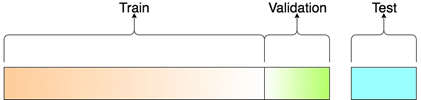

**Training Dataset:** The sample of data used to fit the model.

**Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.


**Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.
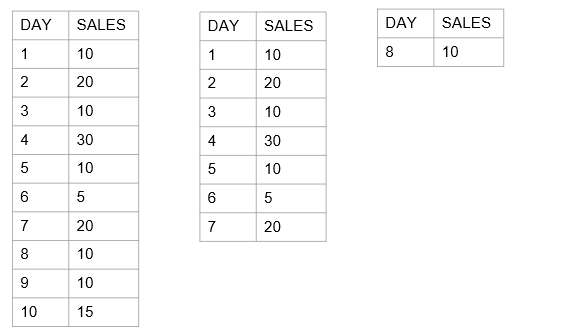

Train Test is best used when you have enough observations to cover all common possibilities. A normal distribution of potential outcomes. If you do not have enough there are other methods such as k-fold Cross Validation

The efficiency of the model is important too if the observations are too large than you could end up with long run time. 
Considerations
 - CPU cost to train the model
-  CPU cost to evaluate the model
-  Is training set representative of data
-  Is test set representative

Commonly used splits are
Train  .8    Test .2   or 80% & 20%
Train  .67  Test .33
Train .5     Test . 5


In [1]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [2]:
# all features and response need to be numbers for scikit-learn
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [3]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
print (X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [4]:
# store response vector in "y"
y = iris.species_num
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_num, Length: 150, dtype: int64


In [5]:
# example of the code working split into train test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris)

In [6]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
119,6.0,2.2,5.0,1.5,Iris-virginica,2
37,4.9,3.1,1.5,0.1,Iris-setosa,0
101,5.8,2.7,5.1,1.9,Iris-virginica,2
23,5.1,3.3,1.7,0.5,Iris-setosa,0
26,5.0,3.4,1.6,0.4,Iris-setosa,0
...,...,...,...,...,...,...
124,6.7,3.3,5.7,2.1,Iris-virginica,2
145,6.7,3.0,5.2,2.3,Iris-virginica,2
70,5.9,3.2,4.8,1.8,Iris-versicolor,1
94,5.6,2.7,4.2,1.3,Iris-versicolor,1


In [7]:
test

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
43,5.0,3.5,1.6,0.6,Iris-setosa,0
141,6.9,3.1,5.1,2.3,Iris-virginica,2
71,6.1,2.8,4.0,1.3,Iris-versicolor,1
49,5.0,3.3,1.4,0.2,Iris-setosa,0
108,6.7,2.5,5.8,1.8,Iris-virginica,2
31,5.4,3.4,1.5,0.4,Iris-setosa,0
30,4.8,3.1,1.6,0.2,Iris-setosa,0
57,4.9,2.4,3.3,1.0,Iris-versicolor,1
69,5.6,2.5,3.9,1.1,Iris-versicolor,1
98,5.1,2.5,3.0,1.1,Iris-versicolor,1


In [8]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


### Repeatable Train-Test Splits
To ensure the train data and test data are not assigned randomly you can turn on or off the random sampling using random_state. The value placed in here will lock in a seed of randomness and is not tunable it is just to toggle various seeds on or off, any number will turn off randomization but still seed you with a locked randomization. 
you will find many examples with a 42 placed in here which is a reference to Douglas Adams Hitchhikers Guide to the Galaxy as the answer to life the universe and everything. 


Lets run this a few times to prove it works

In [10]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
# summarize first 5 rows
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
19,5.1,3.8,1.5,0.3
34,4.9,3.1,1.5,0.1
107,7.3,2.9,6.3,1.8
27,5.2,3.5,1.5,0.2


In [11]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
# summarize first 5 rows
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
131,7.9,3.8,6.4,2.0
10,5.4,3.7,1.5,0.2
148,6.2,3.4,5.4,2.3
30,4.8,3.1,1.6,0.2
120,6.9,3.2,5.7,2.3


In [12]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state = 42)
# summarize first 5 rows
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [13]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state = 42)
# summarize first 5 rows
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


**Stratified Train-Test Splits**

Classification models often do not have a balanced set of observations for the varying classes to be predictid
Stratification indexs in order to create proportions so each class is represented fairly.This will be done in the Y array 

Lets first look at the dataset as it is. 

In [14]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state = 42)

In [15]:
from collections import Counter
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50, 1: 50, 2: 50})
Counter({1: 35, 2: 34, 0: 31})
Counter({0: 19, 2: 16, 1: 15})


In [16]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state = 42, stratify = y)
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50, 1: 50, 2: 50})
Counter({0: 34, 2: 33, 1: 33})
Counter({2: 17, 1: 17, 0: 16})


In [17]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## Revist KNN with Test Train Split

In [18]:
# Review
import sklearn.metrics as metrics
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# 1 create a feature matrix and response vector
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
# store response vector in "y"
y = iris.species_num

#2 Choose estimator
from sklearn.neighbors import KNeighborsClassifier
#3 Instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=1)

#4 Fit the model(model Training)
knn.fit(X_train,y_train)

#5 predict
y_pred=knn.predict(X_test)

#Evaluate
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of test data:  0.94


In [19]:
# Same but now with Test train split
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# 1 create a feature matrix and response vector

# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
# store response vector in "y"
y = iris.species_num

# Test Train Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

#2 Choose estimator
from sklearn.neighbors import KNeighborsClassifier
#3 Instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=1)

#4 Fit the model(model Training)
knn.fit(X_train,y_train)

#5 predict
y_pred=knn.predict(X_test)

#Evaluate
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of test data:  0.94


In [20]:
# Same but now with Test train split
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# 1 create a feature matrix and response vector

# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
# store response vector in "y"
y = iris.species_num

# Test Train Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state = 42)

#2 Choose estimator
from sklearn.neighbors import KNeighborsClassifier
#3 Instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=1)

#4 Fit the model(model Training)
knn.fit(X_train,y_train)

#5 predict
y_pred=knn.predict(X_test)

#Evaluate
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of test data:  0.98


In [21]:
# Same but now with Test train split
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# 1 create a feature matrix and response vector

# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
# store response vector in "y"
y = iris.species_num

# Test Train Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state = 42, stratify = y)

#2 Choose estimator
from sklearn.neighbors import KNeighborsClassifier
#3 Instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=1)

#4 Fit the model(model Training)
knn.fit(X_train,y_train)

#5 predict
y_pred=knn.predict(X_test)

#Evaluate
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of test data:  0.94


In [22]:

# Same but now with Test train split
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# 1 create a feature matrix and response vector

# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
# store response vector in "y"
y = iris.species_num

# Test Train Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state = 42, stratify = y)

#2 Choose estimator
from sklearn.neighbors import KNeighborsClassifier
#3 Instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=11)

#4 Fit the model(model Training)
knn.fit(X_train,y_train)

#5 predict
y_pred=knn.predict(X_test)

#Evaluate
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of test data:  0.96


In [23]:

# locating better values of K for higher accuracy
k_range= range (1,26)
scores=[]
for k in k_range :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))


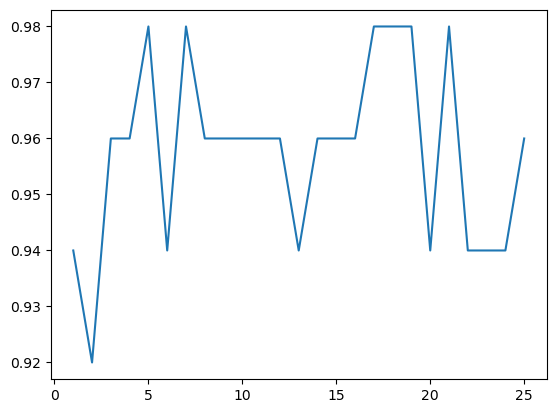

In [24]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores)

In [25]:
# Cross Validation
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10) 
    accuracy_rate.append(score.mean())

In [26]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

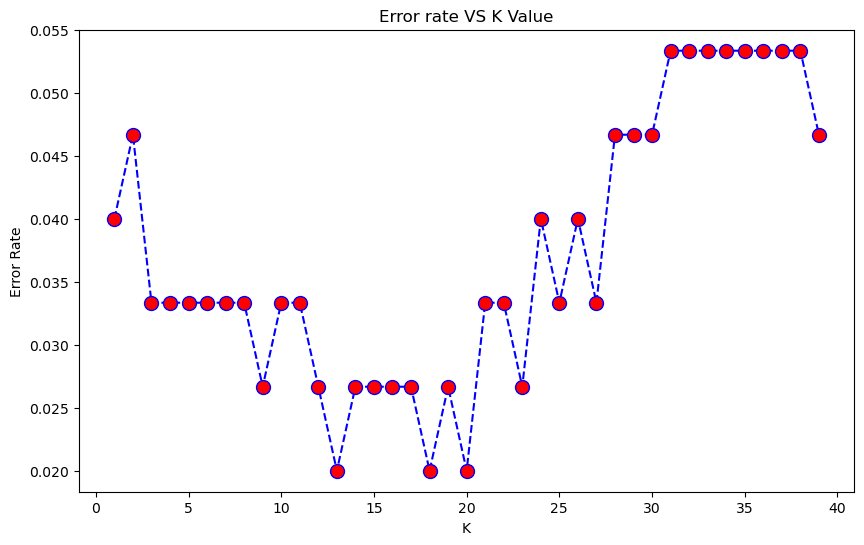

In [27]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
#3 Instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=17)

#4 Fit the model(model Training)
knn.fit(X_train,y_train)

#5 predict
y_pred=knn.predict(X_test)

#Evaluate
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of test data:  0.98


In [29]:
## Lets look at a few other evaluations other than accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
conmat = confusion_matrix(y_test, y_pred)

- Accuracy - How many times was it correct divided by number of chances to be correct
- Confustion Matrix counting up false positive true negatives etc. 
- Precision(positive predictive value) Sum of true positives by the sum of true positives and fp
- Recall( sensitivty or true positive rate)  tp / tp+fn 
- F1 Score a mean of recall and precision 2*precision*recall/ precision+recall
- AUC-ROC Curve performance metric

In [30]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.98


In [31]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix =confusion_matrix(y_test, y_pred)
cf_matrix


array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 16]], dtype=int64)

<Axes: >

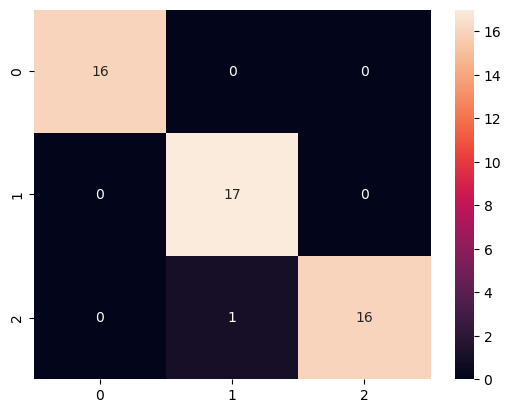

In [32]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Text(50.722222222222214, 0.5, 'actual')

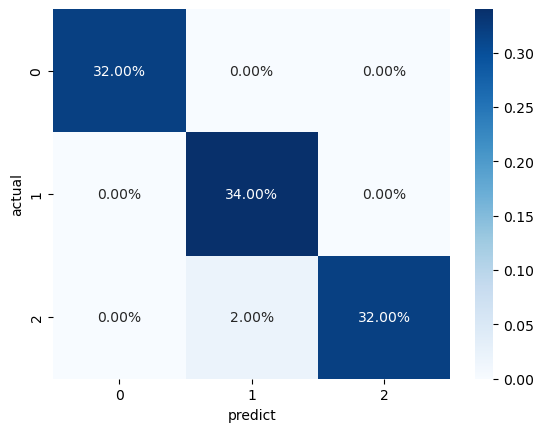

In [33]:
import numpy as np
# Add a % 
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('predict')
plt.ylabel('actual')

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Bias Variance(another form of evaluation)
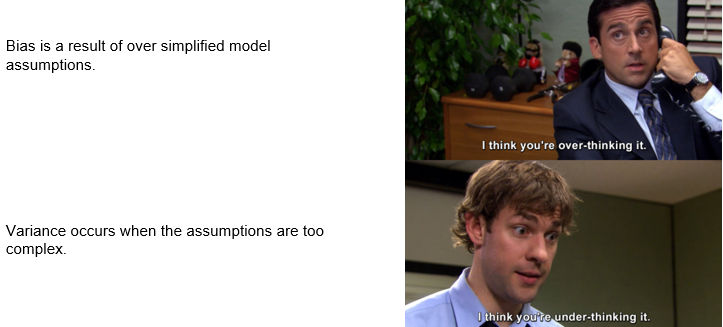 

Simple example

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

# allow plots to appear in the notebook
%matplotlib inline

Brain and body weight

In [36]:
url = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt'
col_names = ['id', 'brain', 'body']
mammals = pd.read_table(url, sep='\s+', skiprows=33, names=col_names, index_col='id')
mammals.head()

,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [37]:
mammals.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [38]:
#We're going to focus on a smaller subset in which the body weight is less than 200:
# only keep rows in which the body weight is less than 200
mammals = mammals[mammals.body < 200]
mammals.shape

(51, 2)



We're now going to pretend that there are only 51 mammal species in existence. In other words, we are pretending that this is the entire dataset of brain and body weights for every known mammal species.

Let's create a scatterplot (using Seaborn) to visualize the relationship between brain and body weight:


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


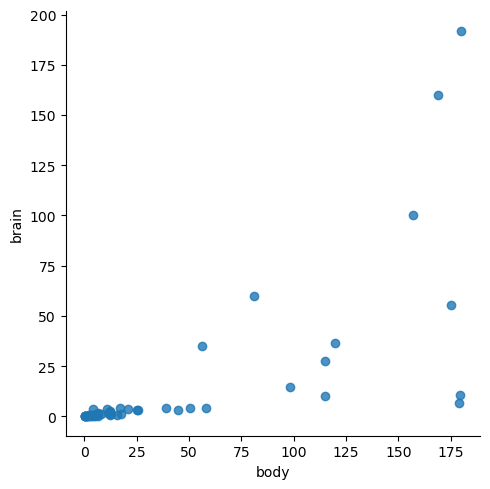

In [39]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, fit_reg=False)

There appears to be a relationship between brain and body weight for mammals.


Making a prediction

Now let's pretend that a new mammal species is discovered. We measure the body weight of every member of this species that we can find, and calculate an average body weight of 100. We want to predict the average brain weight of this species (rather than measuring it directly). How might we do this?


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


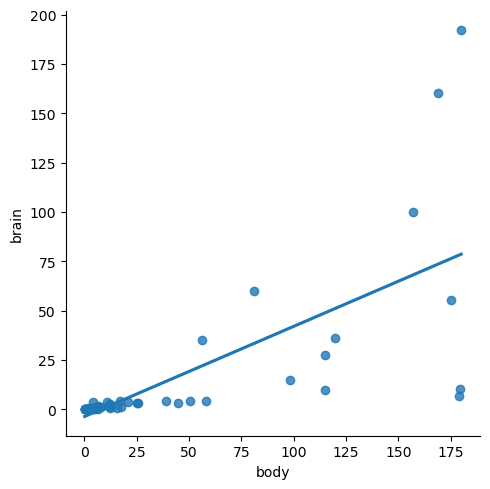

In [40]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None)

We drew a straight line that appears to best capture the relationship between brain and body weight. So, we might predict that our new species has a brain weight of about 45, since that's the approximate y value when x=100.

This is known as a "linear model" or a "linear regression model", which we will study in a future class.



Making a prediction from a sample

Earlier, I said that this dataset contained every known mammal species. That's very convenient, but in the real world, all you ever have is a sample of data. A more realistic situation would be to only have brain and body weights for (let's say) half of the 51 known mammals.

When that new mammal species (with a body weight of 100) is discovered, we still want to make an accurate prediction for the brain weight, but this task might be more difficult since we don't have all of the data that we would ideally like to have.

Let's simulate this situation by assigning each of the 51 observations to either universe 1 or universe 2:


In [41]:
# set a random seed for reproducibility
np.random.seed(12345)

# randomly assign every observation to either universe 1 or universe 2
mammals['universe'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,universe
id,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,1


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


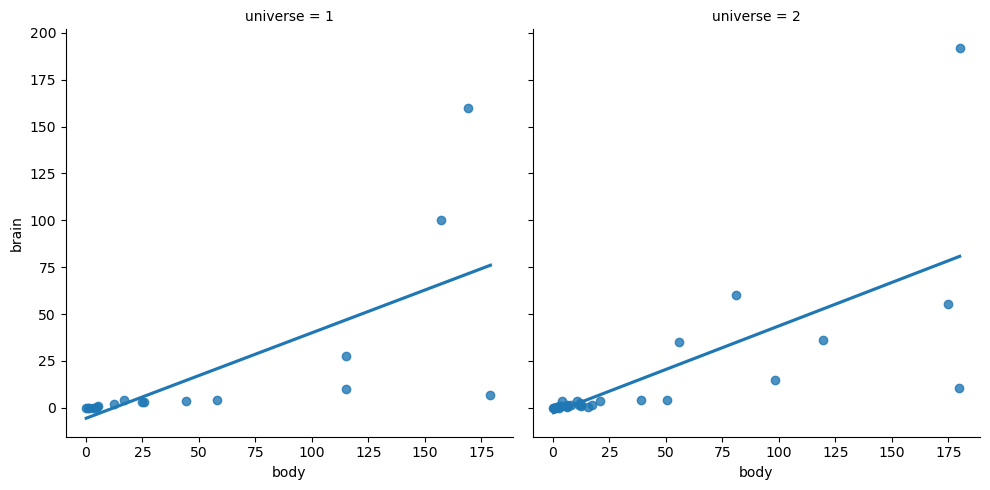

In [42]:
# col='universe' subsets the data by universe and creates two separate plots
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe')

The line looks pretty similar between the two plots, despite the fact that they used separate samples of data. In both cases, we would predict a brain weight of about 45.
It's easier to see the degree of similarity by placing them on the same plot:

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


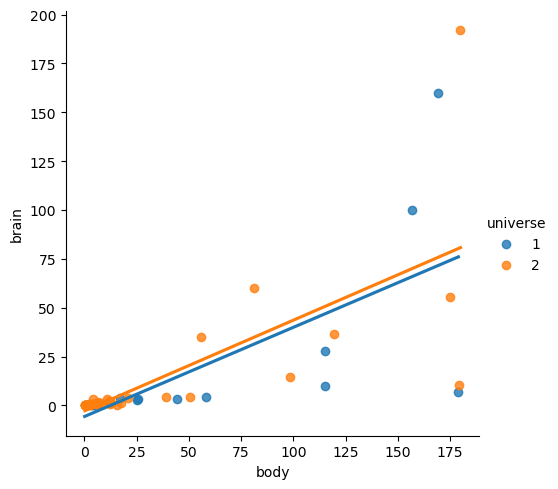

In [43]:
# hue='universe' subsets the data by universe and creates a single plot
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='universe', order = 0)

What was the point of this exercise? This was a visual demonstration of a high bias, low variance model:

- It's high bias because it doesn't fit the data particularly well.
- It's low variance because it doesn't change much depending on which observations happen to be available in that universe.




Let's try something completely different

What would a low bias, high variance model look like? Let's try polynomial regression, with an tenth order polynomial:


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


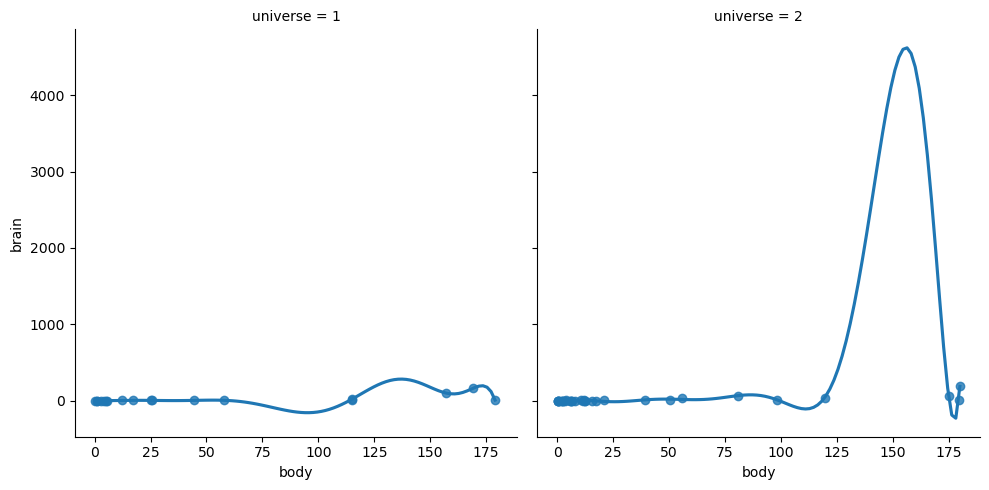

In [44]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=10)



    It's low bias because the models match the data quite well!
    It's high variance because the models are widely different depending on which observations happen to be available in that universe. (For a body weight of 100, the brain weight prediction would be 40 in one universe and 0 in the other universe!)




Can we find a middle ground?

Perhaps we can create a model that has less bias than the linear model, and less variance than the eighth order polynomial?

Let's try a second order polynomial instead:


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


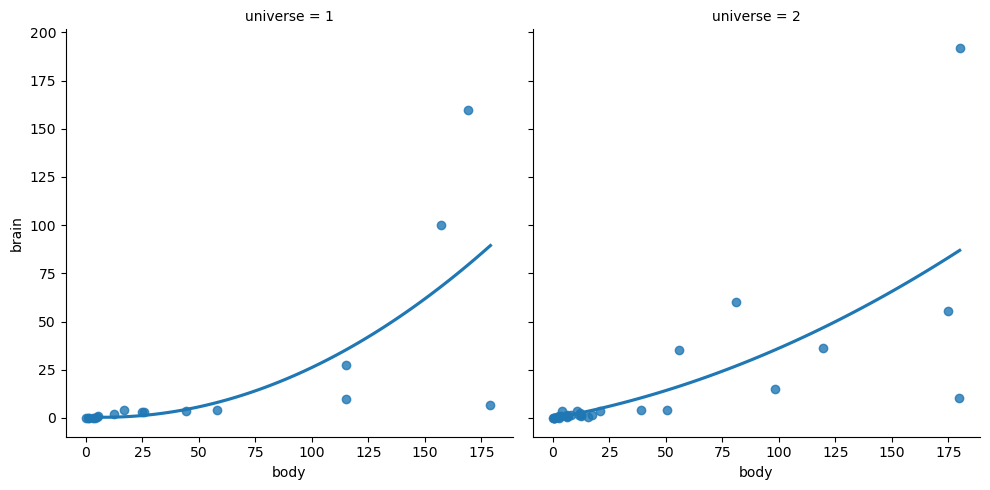

In [45]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=2)

This seems better. In both the left and right plots, it fits the data pretty well, but not too well.
This is the essence of the bias-variance tradeoff: 

You are seeking a model that appropriately balances bias and variance, and thus will generalize to new data (known as "out-of-sample" data).


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [47]:
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of test data:  0.98


In [48]:
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of test data:  0.94


### Introduction to more than Accuracy

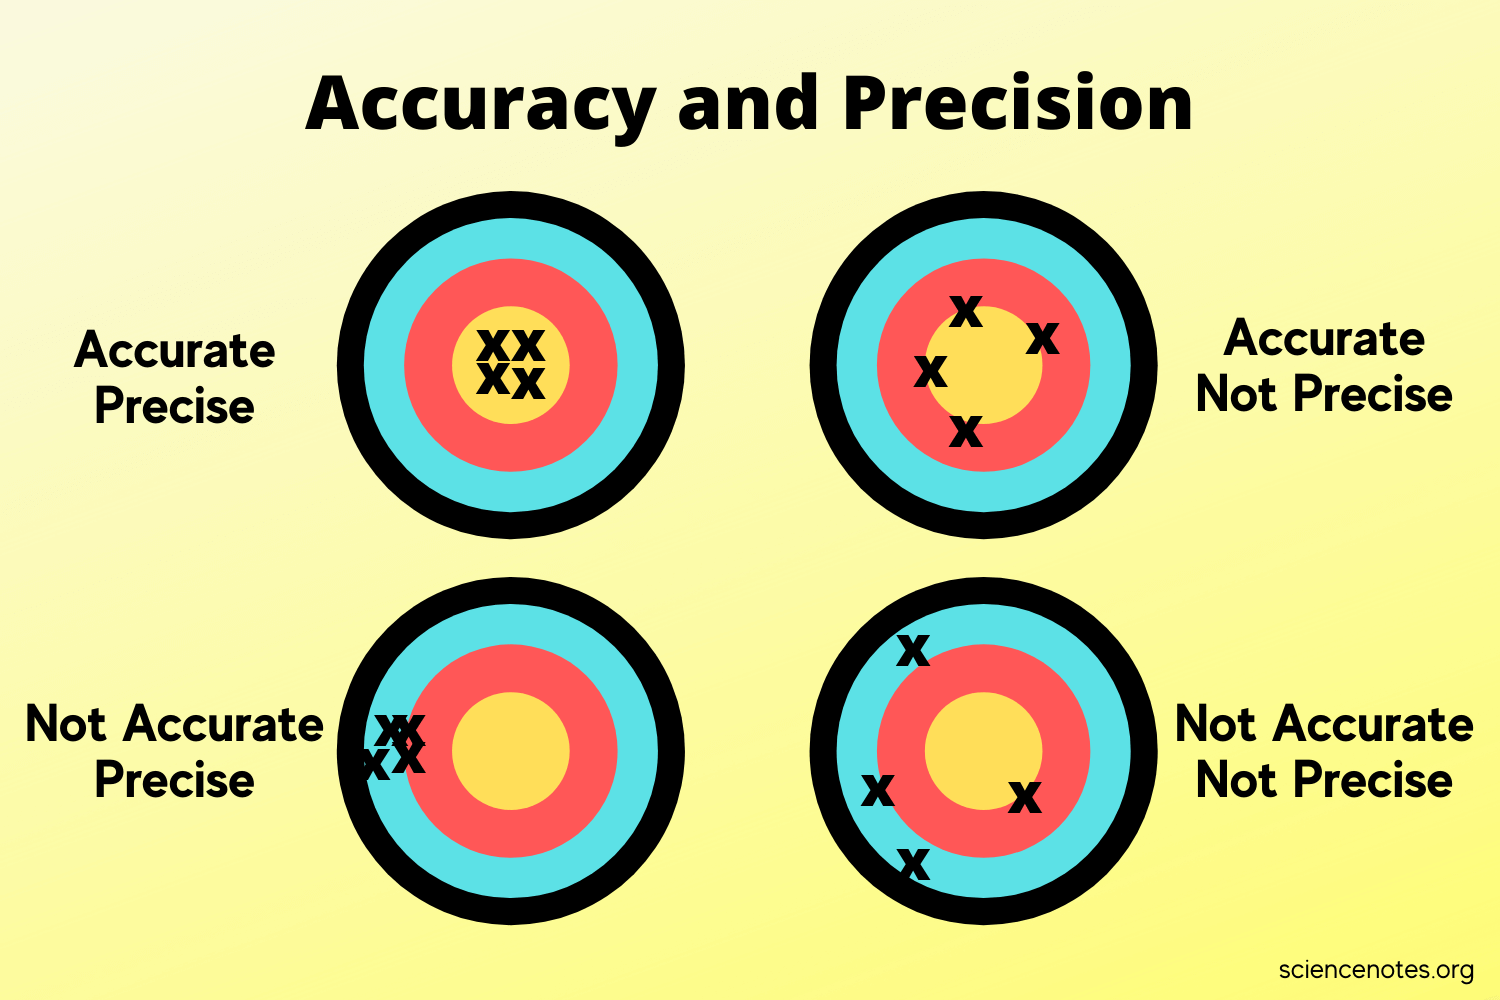

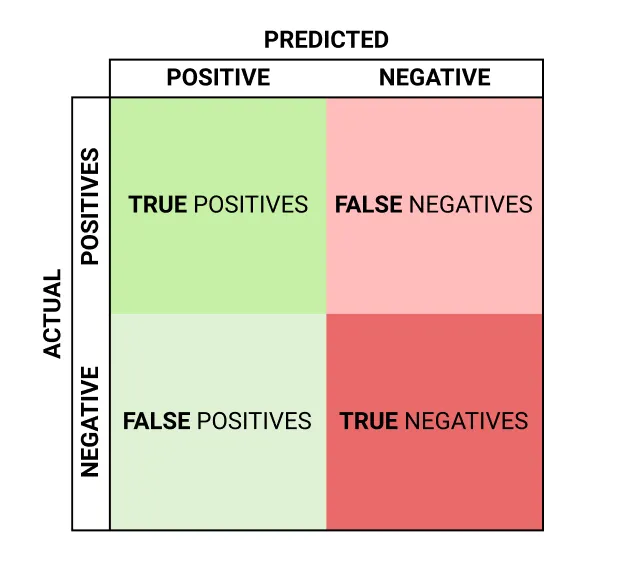

* TRUE POSITIVE - AN ACTUAL POSITIVE THAT IS PREDICTED AS POSITIVE
* TRUE NEGATIVE - AN ACTUAL NEGATIVE THAT IS PREDICTED TO BE NEGATIVE
* FALSE POSITIVE(TYPE 1 ERROR) -  AN ACTUAL NEGATIVE IS PREDICTED TO BE POSITIVE
* FALSE NEGATIVE(TYPE 2 ERROR) - AN ACTUAL POSITIVE IS PREDICTED TO BE NEGATIVE


* Precision measures the accuracy of positive predictions
* Recall measures the completeness of postive predictions
* f1-score combines Precision and recall or how many times a model made a correct prediction across the entire dataset
* Support is the number of occurances of the class in a dataset


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))


Confusion Matrix
[[16  0  0]
 [ 0 15  1]
 [ 0  0 18]]
Accuracy of test data:  0.98
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        16
           2       0.95      1.00      0.97        18

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

